In [1]:
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "../data/de_train.parquet"
df_de_train = pd.read_parquet(path,engine="pyarrow")
df_de_train.head()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629


In [3]:
X = df_de_train.iloc[:,5:]

In [4]:
reducer = PCA(n_components=100 )
Xr = reducer.fit_transform(X)

In [5]:
Xr.shape

(614, 100)

In [6]:
d = df_de_train.iloc[:,:5]
d['PCA1'] = Xr[:,0]
d['PCA2'] = Xr[:,1]
d['PCA3'] = Xr[:,2]
list_top_drugs = []
display(d.sort_values('PCA1', ascending = False ).head(8) )
list_top_drugs += d.sort_values('PCA1', ascending = False ).head(8)['sm_name'].to_list()
print(list_top_drugs)
display( d.sort_values('PCA2', ascending = False ).head(8) )
list_top_drugs += d.sort_values('PCA2', ascending = False ).head(8)['sm_name'].to_list()
display( d.sort_values('PCA3', ascending = False ).head(8) )
list_top_drugs += d.sort_values('PCA3', ascending = False ).head(8)['sm_name'].to_list()
print(list(set(list_top_drugs)))

,cell_type,sm_name,sm_lincs_id,SMILES,control,PCA1,PCA2,PCA3
280,T regulatory cells,Belinostat,LSM-43181,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO,True,2627.138763,-2.898142,138.237992
143,NK cells,Alvocidib,LSM-1011,CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc...,False,1799.699242,-67.489870,20.469703
114,NK cells,IN1451,LSM-4349,Nc1ncnc2c1c(I)cn2[C@@H]1O[C@H](CO)[C@@H](O)[C@...,False,1486.503078,-39.998829,23.483177
372,Myeloid cells,MLN 2238,LSM-4944,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,False,1460.792675,-18.126251,-171.037536
371,B cells,MLN 2238,LSM-4944,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,False,1358.927121,-70.274381,-43.627587
144,T cells CD4+,Alvocidib,LSM-1011,CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc...,False,1255.227400,-31.968010,46.209493
373,NK cells,MLN 2238,LSM-4944,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,False,1249.357191,-43.195922,21.100219
535,B cells,Oprozomib (ONX 0912),LSM-45496,COC[C@H](NC(=O)c1cnc(C)s1)C(=O)N[C@@H](COC)C(=...,False,1170.976851,-66.606928,-52.543825


['Belinostat', 'Alvocidib', 'IN1451', 'MLN 2238', 'MLN 2238', 'Alvocidib', 'MLN 2238', 'Oprozomib (ONX 0912)']


,cell_type,sm_name,sm_lincs_id,SMILES,control,PCA1,PCA2,PCA3
278,T cells CD4+,Belinostat,LSM-43181,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO,True,-14.027104,2020.080065,25.732059
277,NK cells,Belinostat,LSM-43181,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO,True,528.046950,1010.091666,-12.281671
275,B cells,Belinostat,LSM-43181,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO,True,-9.250525,966.496213,-99.783872
276,Myeloid cells,Belinostat,LSM-43181,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO,True,433.792277,783.015093,-669.622545
290,T cells CD4+,Scriptaid,LSM-2499,O=C1c2cccc3cccc(c23)C(=O)N1CCCCCC(O)=NO,False,-61.490594,335.268196,6.148696
135,T cells CD4+,Resminostat,LSM-45663,CN(C)Cc1ccc(S(=O)(=O)n2ccc(/C=C/C(=O)NO)c2)cc1,False,-38.188361,311.900435,-3.380581
65,T cells CD4+,Vorinostat,LSM-3828,O=C(CCCCCCC(=O)Nc1ccccc1)NO,False,-49.342019,288.866338,-2.341653
279,T cells CD8+,Belinostat,LSM-43181,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO,True,-280.680601,255.656498,16.590977


,cell_type,sm_name,sm_lincs_id,SMILES,control,PCA1,PCA2,PCA3
538,T cells CD4+,Oprozomib (ONX 0912),LSM-45496,COC[C@H](NC(=O)c1cnc(C)s1)C(=O)N[C@@H](COC)C(=...,False,251.261364,193.161051,782.547497
123,T cells CD4+,CEP-18770 (Delanzomib),LSM-45410,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)c1cccc(-c2ccccc...,False,131.872705,175.834043,728.165445
374,T cells CD4+,MLN 2238,LSM-4944,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,False,-92.172990,168.552356,710.680759
124,T cells CD8+,CEP-18770 (Delanzomib),LSM-45410,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)c1cccc(-c2ccccc...,False,-341.708866,92.278145,362.414577
375,T cells CD8+,MLN 2238,LSM-4944,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,False,-443.256743,85.059467,338.713960
110,NK cells,Proscillaridin A;Proscillaridin-A,LSM-1476;LSM-5290,C[C@@H]1O[C@@H](O[C@@H]2C=C3CC[C@@H]4[C@H](CC[...,False,-24.711543,-10.486517,303.781234
527,NK cells,Ganetespib (STA-9090),LSM-45281,CC(C)c1cc(-c2n[nH]c(=O)n2-c2ccc3c(ccn3C)c2)c(O...,False,4.728942,153.414178,219.392380
539,T regulatory cells,Oprozomib (ONX 0912),LSM-45496,COC[C@H](NC(=O)c1cnc(C)s1)C(=O)N[C@@H](COC)C(=...,False,-28.675311,34.361764,193.815080


['Scriptaid', 'MLN 2238', 'Resminostat', 'Vorinostat', 'Oprozomib (ONX 0912)', 'Proscillaridin A;Proscillaridin-A', 'Belinostat', 'CEP-18770 (Delanzomib)', 'Alvocidib', 'Ganetespib (STA-9090)', 'IN1451']


In [7]:
list_top_drugs

['Belinostat',
 'Alvocidib',
 'IN1451',
 'MLN 2238',
 'MLN 2238',
 'Alvocidib',
 'MLN 2238',
 'Oprozomib (ONX 0912)',
 'Belinostat',
 'Belinostat',
 'Belinostat',
 'Belinostat',
 'Scriptaid',
 'Resminostat',
 'Vorinostat',
 'Belinostat',
 'Oprozomib (ONX 0912)',
 'CEP-18770 (Delanzomib)',
 'MLN 2238',
 'CEP-18770 (Delanzomib)',
 'MLN 2238',
 'Proscillaridin A;Proscillaridin-A',
 'Ganetespib (STA-9090)',
 'Oprozomib (ONX 0912)']

In [8]:
v1_color = df_de_train['cell_type']
v2_color = df_de_train['sm_name'].copy()
l = [t for t in df_de_train['sm_name'] if t.endswith('nib') ]
m = v2_color.isin(l)
v2_color[~m] = 'non -nib'
v3_color = df_de_train['sm_name'].copy()
v3_color[m] = '*nib'
v4_color = df_de_train['control']#.copy()

In [9]:
df_de_train['sm_name'].value_counts().loc['Clotrimazole']

4

In [10]:
df_de_train['sm_name'].value_counts().head(20)
list_top_drugs =df_de_train['sm_name'].value_counts().index[0:10].tolist()
list_top_drugs

['R428',
 'MLN 2238',
 'Dactolisib',
 'LDN 193189',
 'Porcn Inhibitor III',
 'O-Demethylated Adapalene',
 'Penfluridol',
 'Dabrafenib',
 'Linagliptin',
 'CHIR-99021']

In [11]:
# list_top_drugs = ['MLN 2238', 'Resminostat', 
#                   'CEP-18770 (Delanzomib)', 
#                   'Oprozomib (ONX 0912)', 
#                   'Belinostat', 
#                   'Vorinostat', 
#                   'Ganetespib (STA-9090)', 
#                   'Scriptaid', 
#                   'Proscillaridin A;Proscillaridin-A', 
#                   'Alvocidib', 'IN1451'] # Using PCA vectors
m = df_de_train['sm_name'].isin(list_top_drugs)
v5_color = df_de_train['sm_name'].copy()
v5_color[~m] = np.nan

In [12]:
list_cfg = [['cell type',v1_color], 
            ['control' , v4_color ] , 
            ['top compounds',v5_color] ]

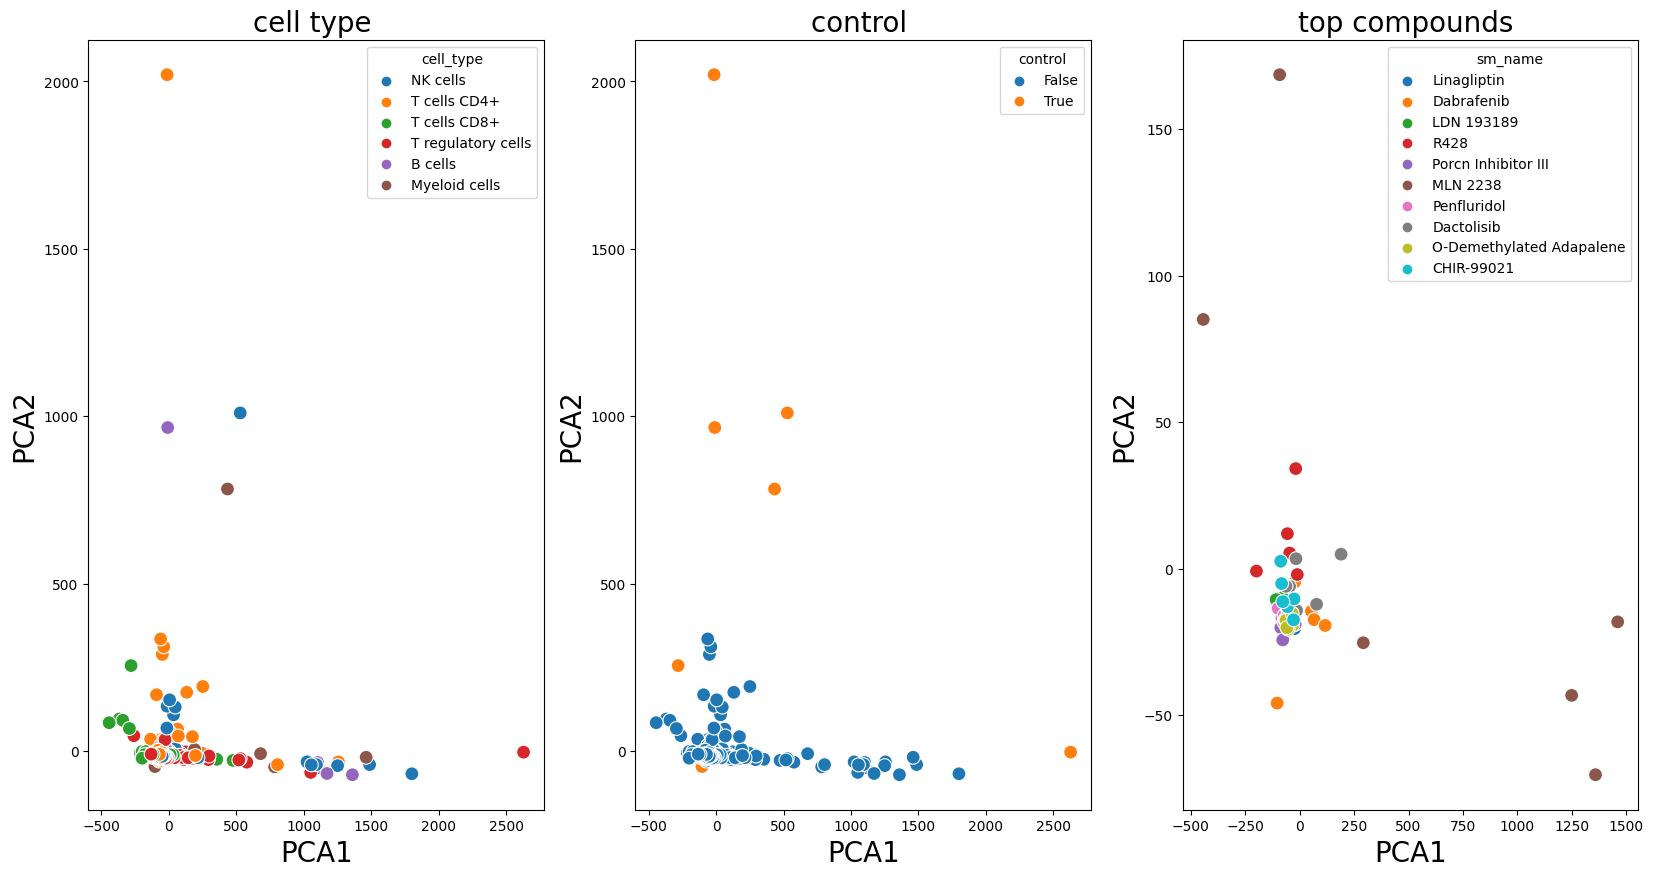

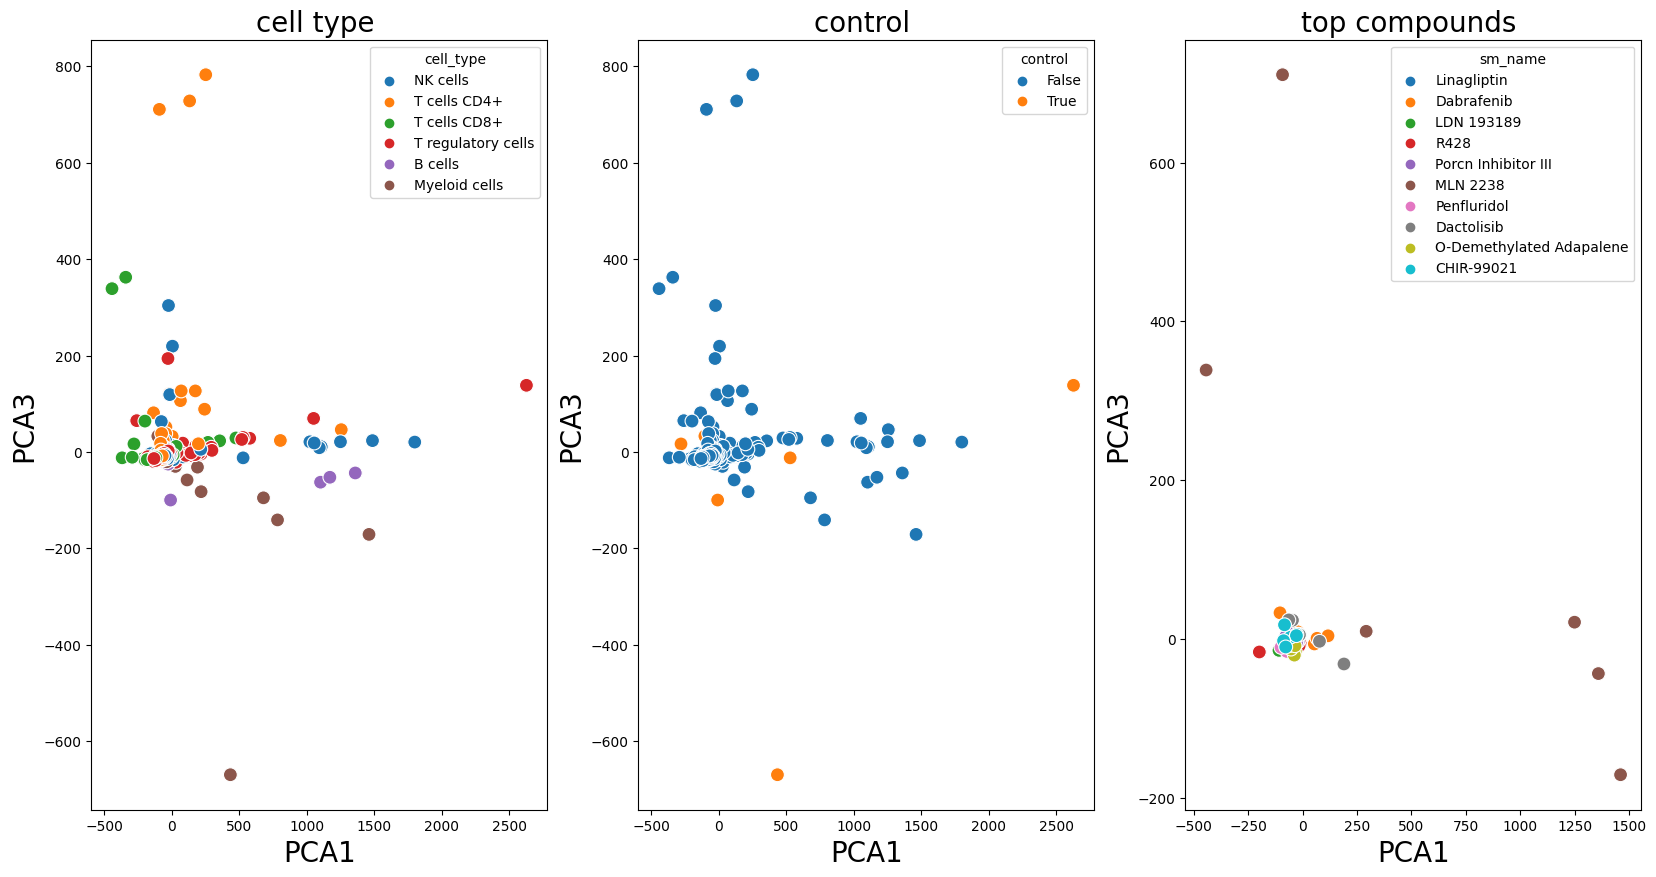

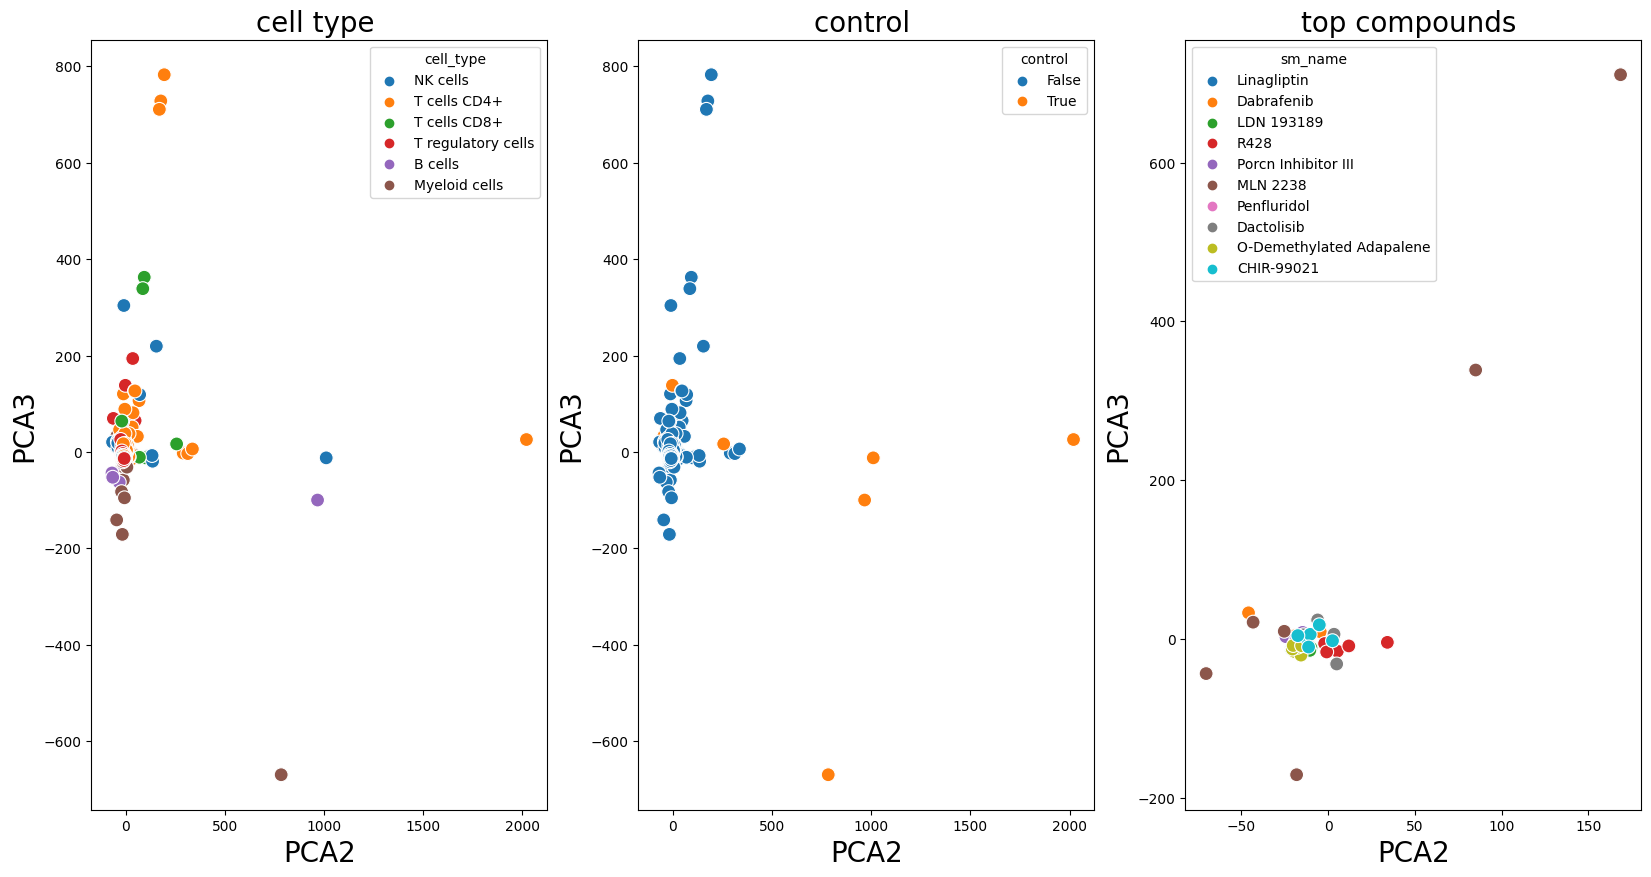

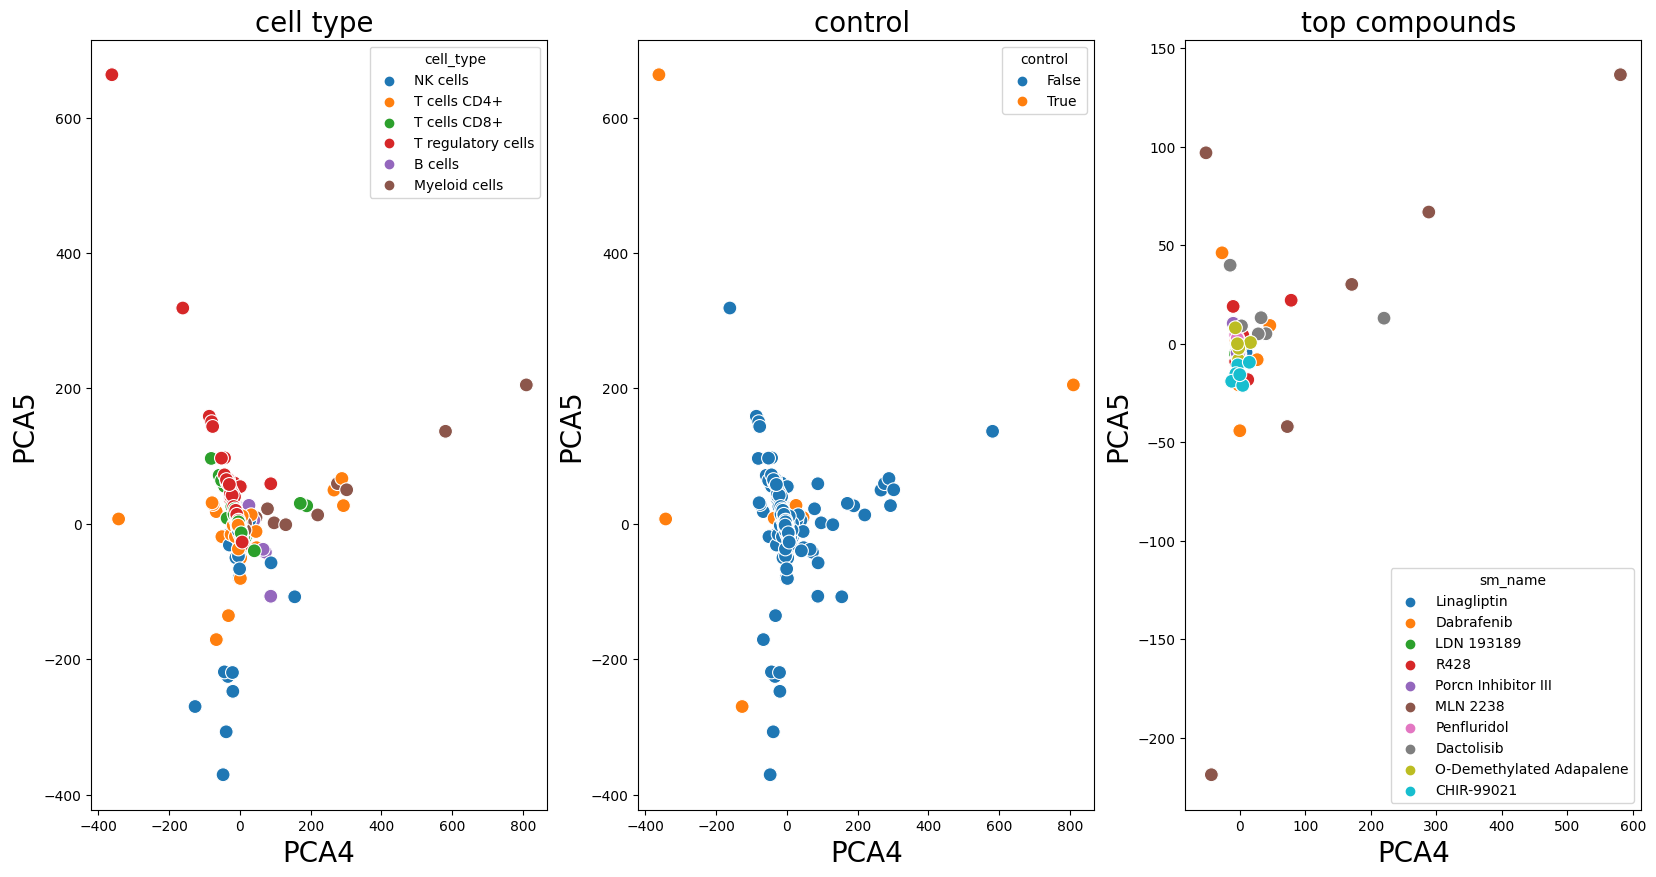

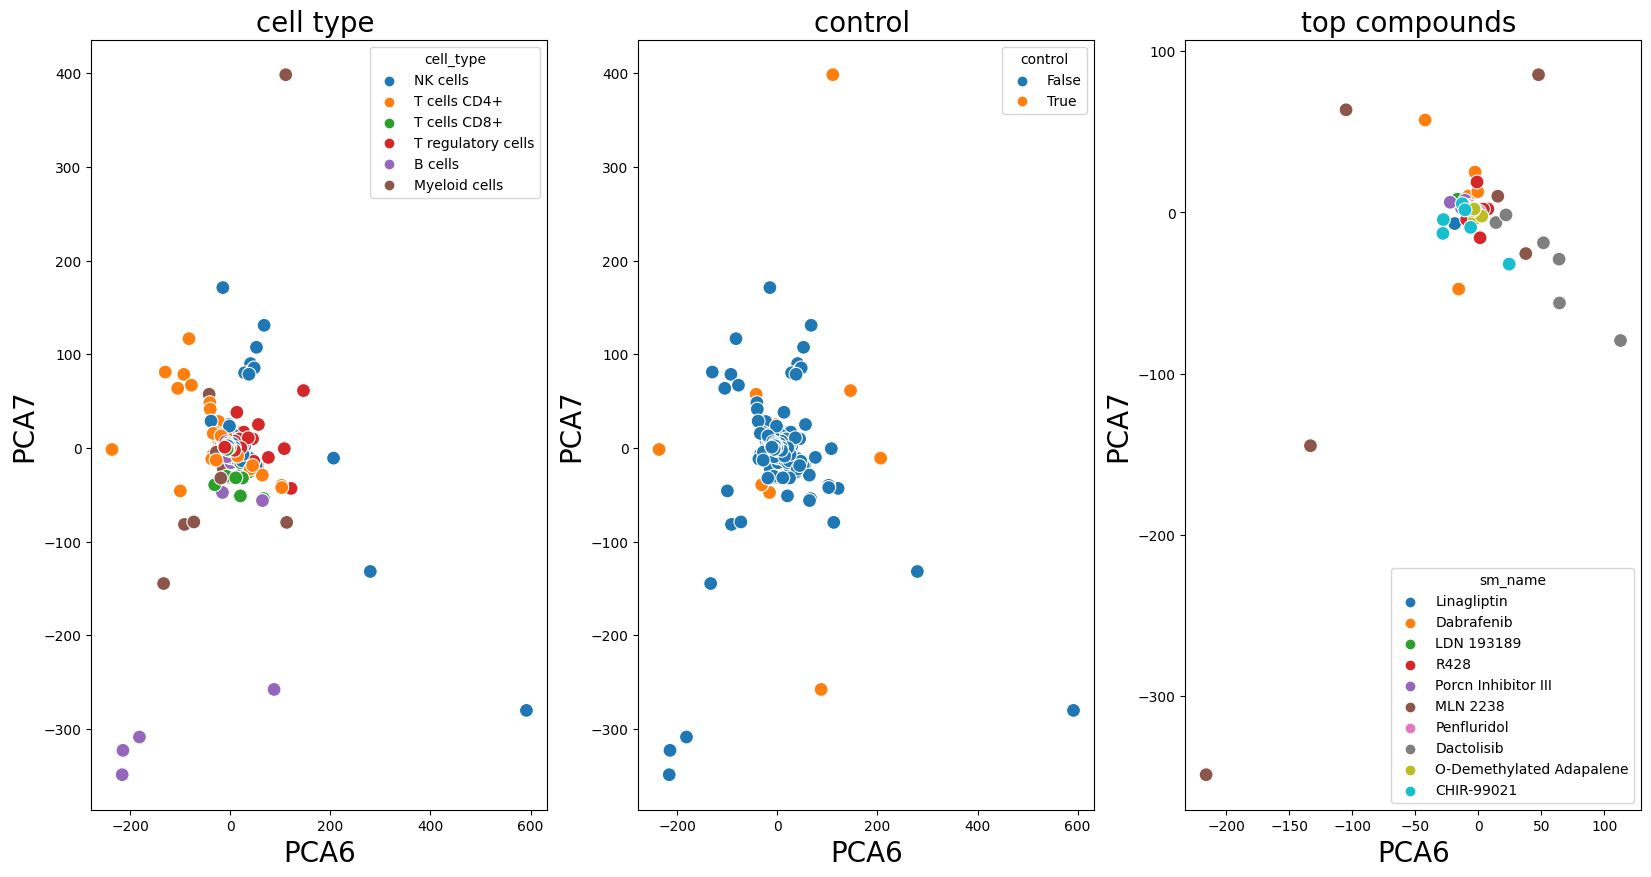

In [13]:
str_inf = 'PCA' 

for i,j in [[0,1],[0,2],[1,2],[3,4],[5,6]]:
    plt.figure(figsize = (20,10)); 
    ic=0
    for str_inf1, v_for_color in list_cfg: # , ['*nib compounds ',v2_color], ['non *nib compounds',v3_color ] ]:
        ic+=1; 
        plt.subplot(1,len(list_cfg),ic)
        sns.scatterplot(x= Xr[:,i], y = Xr[:,j], 
                        hue =  v_for_color ,s = 100) 
        plt.xlabel(str_inf+str(i+1), fontsize = 20)
        plt.ylabel(str_inf+str(j+1), fontsize = 20)
        plt.title(str_inf1 + ' ', fontsize = 20 )

plt.show()
plt.close()    

# Look at Compound Data

In [14]:
d = df_de_train[['sm_name','sm_lincs_id','SMILES']].drop_duplicates()
print(d.shape)
d.to_csv('../data/compounds.csv')
display( d.head(10) )
print(list(df_de_train['sm_name'].unique() ) )

(146, 3)


,sm_name,sm_lincs_id,SMILES
0,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1
4,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...
8,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...
14,Vandetanib,LSM-1199,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1
18,Bosutinib,LSM-1190,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...
22,Ceritinib,LSM-36374,Cc1cc(Nc2ncc(Cl)c(Nc3ccccc3S(=O)(=O)C(C)C)n2)c...
26,Lamivudine,LSM-5215,Nc1ccn([C@@H]2CS[C@H](CO)O2)c(=O)n1
30,Crizotinib,LSM-1027,C[C@@H](Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)...
36,Cabozantinib,LSM-1195,COc1cc2nccc(Oc3ccc(NC(=O)C4(C(=O)Nc5ccc(F)cc5)...
40,Flutamide,LSM-2621,CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1


['Clotrimazole', 'Mometasone Furoate', 'Idelalisib', 'Vandetanib', 'Bosutinib', 'Ceritinib', 'Lamivudine', 'Crizotinib', 'Cabozantinib', 'Flutamide', 'Dasatinib', 'Selumetinib', 'Trametinib', 'ABT-199 (GDC-0199)', 'Oxybenzone', 'Vorinostat', 'Raloxifene', 'Linagliptin', 'Lapatinib', 'Canertinib', 'Disulfiram', 'Vardenafil', 'Palbociclib', 'Ricolinostat', 'Dabrafenib', 'Proscillaridin A;Proscillaridin-A', 'IN1451', 'Ixabepilone', 'CEP-18770 (Delanzomib)', 'RG7112', 'MK-5108', 'Resminostat', 'IMD-0354', 'Alvocidib', 'LY2090314', 'Methotrexate', 'LDN 193189', 'Tacalcitol', 'Colchicine', 'R428', 'TL_HRAS26', 'BMS-387032', 'CGP 60474', 'TIE2 Kinase Inhibitor', 'PD-0325901', 'Isoniazid', 'GSK-1070916', 'Masitinib', 'Saracatinib', 'CC-401', 'Decitabine', 'Ketoconazole', 'HYDROXYUREA', 'BAY 61-3606', 'Navitoclax', 'Porcn Inhibitor III', 'GW843682X', 'Prednisolone', 'Tamatinib', 'Tosedostat', 'GSK256066', 'MGCD-265', 'AZD-8330', 'RN-486', 'Amiodarone', 'Belinostat', 'RVX-208', 'GO-6976', 'Scrip

In [15]:
l = [len(s) for s in df_de_train['SMILES']]
np.sort(list(set(l)) )

array([  8,  15,  26,  27,  28,  30,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  77,  81,  83,  88,  91,  93,
        96,  97,  99, 101, 104, 118, 119, 122])

In [16]:
display( df_de_train['sm_name'].value_counts().head(20) )
display( df_de_train['sm_name'].value_counts().tail(10) )
df_de_train['sm_name'].value_counts().value_counts()

R428                        6
MLN 2238                    6
Dactolisib                  6
LDN 193189                  6
Porcn Inhibitor III         6
O-Demethylated Adapalene    6
Penfluridol                 6
Dabrafenib                  6
Linagliptin                 6
CHIR-99021                  6
Belinostat                  6
Palbociclib                 6
Foretinib                   6
Idelalisib                  6
Crizotinib                  6
Alvocidib                   5
Oprozomib (ONX 0912)        5
Mubritinib (TAK 165)        4
TPCA-1                      4
BI-D1870                    4
Name: sm_name, dtype: int64

HYDROXYUREA     4
Ketoconazole    4
Decitabine      4
CC-401          4
Saracatinib     4
Masitinib       4
GSK-1070916     4
Isoniazid       4
Resminostat     3
CGP 60474       3
Name: sm_name, dtype: int64

4    127
6     15
5      2
3      2
Name: sm_name, dtype: int64

In [17]:
%%time
train_aggregate_mean_or_median_or_whatever = df_de_train.iloc[:,5:].quantile(0.7)# median()
train_aggregate_mean_or_median_or_whatever

CPU times: user 473 ms, sys: 86.8 ms, total: 560 ms
Wall time: 565 ms


A1BG        0.391181
A1BG-AS1    0.416538
A2M         0.283649
A2M-AS1     0.363347
A2MP1       0.484551
              ...   
ZXDB        0.446216
ZXDC        0.406357
ZYG11B      0.379261
ZYX         0.181874
ZZEF1       0.168090
Name: 0.7, Length: 18211, dtype: float64

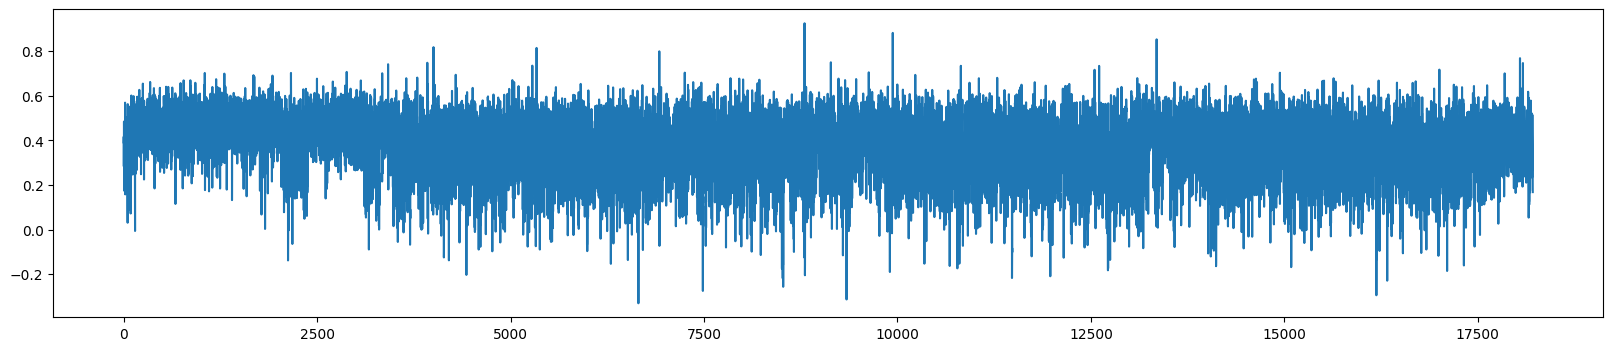

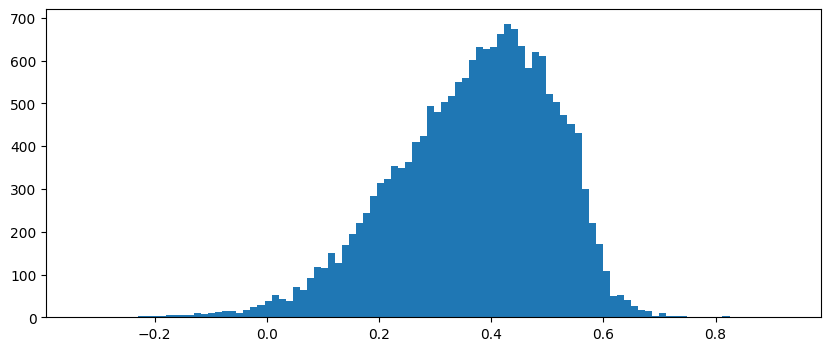

count    18211.000000
mean         0.369443
std          0.140564
min         -0.330502
25%          0.279551
50%          0.385830
75%          0.474798
max          0.925311
Name: 0.7, dtype: float64

CPU times: user 803 ms, sys: 181 ms, total: 984 ms
Wall time: 529 ms


In [18]:
%%time
d = train_aggregate_mean_or_median_or_whatever
plt.figure(figsize = (20,4) )
plt.plot(d.values)
plt.show()
plt.figure(figsize = (10,4) )
plt.hist(d.values, bins = 100)
plt.show()

display( d.describe() )

# Aggregate

In [19]:
%%time
train_aggr_direct = df_de_train[ ['sm_name'] + list(df_de_train.columns[5:])  ].groupby('sm_name' ).quantile(0.6)# median()
train_aggr_direct


CPU times: user 1.17 s, sys: 64.8 ms, total: 1.23 s
Wall time: 1.23 s


,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
sm_name,,,,,,,,,,,,,,,,,,,,,
5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine,0.221183,0.110144,0.119823,1.811645,0.384747,0.279398,0.278817,0.244445,-0.368721,0.105570,...,-0.314541,-0.233554,-0.088109,0.823918,0.650309,0.932765,0.325336,0.539654,-0.182476,0.793765
ABT-199 (GDC-0199),-0.016625,-0.028188,0.300620,-0.038247,0.159771,0.280378,0.062120,0.014485,0.633063,-0.000461,...,0.216945,0.144040,-0.003467,-0.035300,0.339478,-0.118371,0.077139,-0.113892,-0.118818,-0.025581
ABT737,0.284165,0.207918,0.007377,0.040626,0.408708,0.897430,0.785994,0.202074,-0.180838,0.098870,...,0.204570,-0.072994,0.028632,0.489872,0.110824,0.470256,0.265719,-0.030161,0.079042,-0.179679
AMD-070 (hydrochloride),-0.104493,-0.013309,0.065029,0.674605,0.055424,0.306947,-0.157391,1.078066,0.194912,0.280990,...,0.152608,-0.007115,0.217046,0.185814,0.146062,0.390610,0.186847,0.462822,0.047097,0.186334
AT 7867,0.459841,-0.127501,0.166103,0.041800,0.100890,0.282681,-0.237650,0.277010,-0.110325,0.278671,...,-0.467732,-0.037551,0.056071,-0.086615,0.177606,0.336986,0.021758,0.485923,0.089861,0.217435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vandetanib,0.041174,-0.232903,-0.248613,-0.438482,-0.034993,-0.363790,0.214075,0.101200,0.001534,0.727678,...,0.105996,0.088807,-0.368547,0.080728,-0.046310,0.189121,0.163118,0.192055,0.238930,0.307719
Vanoxerine,0.221245,-0.331957,0.293666,0.175037,0.337971,0.338007,-0.197014,0.013721,-0.168036,0.246463,...,0.015041,0.422342,0.156697,0.195910,0.333085,0.060842,-0.052275,0.249782,-0.155526,-0.149751
Vardenafil,0.091402,0.635832,-0.153545,0.038672,0.039170,-0.129344,-0.053308,-0.315157,0.137955,0.518179,...,0.050197,0.004554,0.867308,0.372991,0.437435,-0.226052,0.151396,0.163040,0.326769,-0.353765


In [20]:
%%time 
n_components = 25
X = df_de_train.iloc[:,5:]
print(X.shape)
str_inf = 'PCA' 
reducer = PCA(n_components=n_components )
Xr = reducer.fit_transform(X)
Xr_inv_trans = reducer.inverse_transform(Xr)
df_red = pd.DataFrame(Xr_inv_trans, columns = df_de_train.columns[5:])
df_red['sm_name'] = df_de_train['sm_name']

train_aggr_pca_reduced = df_red.groupby('sm_name' ).quantile(0.53)# median()
train_aggr_pca_reduced

(614, 18211)
CPU times: user 7.35 s, sys: 2.12 s, total: 9.47 s
Wall time: 1.99 s


,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
sm_name,,,,,,,,,,,,,,,,,,,,,
5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine,0.156432,0.148225,0.303646,0.665025,0.339356,0.217820,-0.097709,0.267968,-0.264999,0.543096,...,-0.317820,-0.063044,0.071438,-0.045963,0.309523,0.225080,0.342373,0.393548,-0.209484,0.223930
ABT-199 (GDC-0199),0.085121,0.068564,-0.029922,0.003662,0.092045,0.394776,-0.038436,0.139079,-0.042032,0.009301,...,0.034854,-0.020567,-0.061919,0.132636,0.133729,0.115983,0.112889,0.052023,-0.002072,-0.159864
ABT737,0.410059,0.264349,0.177391,0.170797,0.309542,0.968728,0.038586,0.321403,-0.055766,-0.026106,...,0.054937,0.057083,0.052890,0.348610,0.414311,0.373323,0.184329,0.124303,-0.010549,-0.120572
AMD-070 (hydrochloride),0.139322,0.098066,0.144728,0.181128,0.267464,0.170770,-0.037588,0.196204,-0.110568,0.091036,...,0.036737,0.043978,-0.052573,0.127069,0.289843,0.217336,0.182672,0.116250,-0.010451,-0.109076
AT 7867,0.068693,0.093919,-0.043163,-0.054306,0.159617,0.314078,-0.093298,0.229866,-0.128338,0.244475,...,-0.125852,-0.037123,-0.057928,0.077192,0.205533,0.110225,0.148437,0.153786,-0.106197,-0.070846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vandetanib,-0.128252,-0.065438,-0.157179,-0.163373,-0.201198,-0.348062,-0.089401,-0.018508,-0.114427,0.103365,...,-0.014678,-0.154188,-0.238544,-0.098735,-0.057700,-0.045777,0.050605,0.028051,-0.032408,-0.142329
Vanoxerine,0.139507,0.143348,0.067715,-0.052400,0.133489,0.451856,-0.047010,0.119784,-0.159162,0.218311,...,-0.038338,-0.047792,-0.016586,0.153225,0.185050,0.135564,0.136772,0.141150,0.036327,-0.099024
Vardenafil,-0.096195,-0.029549,-0.042279,0.009088,-0.078400,-0.244397,-0.084857,0.007108,-0.140340,0.144856,...,-0.039284,-0.129505,-0.165708,-0.034903,0.004475,-0.017115,0.073362,0.052368,0.000267,-0.115355


In [21]:
%%time
fn = '../data/id_map.csv'
df_id_map = pd.read_csv(fn)
print(df_id_map.shape)
display(df_id_map)
fn = '../data/sample_submission.csv'
df = pd.read_csv(fn, index_col = 0)
print(df.shape)
df

(255, 3)


,id,cell_type,sm_name
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,1,B cells,ABT-199 (GDC-0199)
2,2,B cells,ABT737
3,3,B cells,AMD-070 (hydrochloride)
4,4,B cells,AT 7867
...,...,...,...
250,250,Myeloid cells,Vandetanib
251,251,Myeloid cells,Vanoxerine
252,252,Myeloid cells,Vardenafil
253,253,Myeloid cells,Vorinostat


(255, 18211)
CPU times: user 2.03 s, sys: 80.7 ms, total: 2.11 s
Wall time: 2.11 s


,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
predict_method = 'train_aggregation_by_compounds'
predict_method = 'train_after_pca_reduction_aggregation_by_compounds'

In [23]:
%%time

if predict_method == 'train_aggregation_by_compounds':
    df = df_id_map.merge(train_aggr, how = 'left', on = 'sm_name')
    df = df.set_index('id').iloc[:,2:]
elif predict_method == 'train_after_pca_reduction_aggregation_by_compounds':
    df = df_id_map.merge(train_aggr_pca_reduced, how = 'left', on = 'sm_name')
    df = df.set_index('id').iloc[:,2:]
else:
    # consant for each target submission:
    for i,col in enumerate( df.columns ):
        df[col] = train_aggregate_mean_or_median_or_whatever[col]
        if (i%1000) == 0: print(i,col)
    
df    

CPU times: user 60.9 ms, sys: 47.9 ms, total: 109 ms
Wall time: 107 ms


,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
id,,,,,,,,,,,,,,,,,,,,,
0,0.156432,0.148225,0.303646,0.665025,0.339356,0.217820,-0.097709,0.267968,-0.264999,0.543096,...,-0.317820,-0.063044,0.071438,-0.045963,0.309523,0.225080,0.342373,0.393548,-0.209484,0.223930
1,0.085121,0.068564,-0.029922,0.003662,0.092045,0.394776,-0.038436,0.139079,-0.042032,0.009301,...,0.034854,-0.020567,-0.061919,0.132636,0.133729,0.115983,0.112889,0.052023,-0.002072,-0.159864
2,0.410059,0.264349,0.177391,0.170797,0.309542,0.968728,0.038586,0.321403,-0.055766,-0.026106,...,0.054937,0.057083,0.052890,0.348610,0.414311,0.373323,0.184329,0.124303,-0.010549,-0.120572
3,0.139322,0.098066,0.144728,0.181128,0.267464,0.170770,-0.037588,0.196204,-0.110568,0.091036,...,0.036737,0.043978,-0.052573,0.127069,0.289843,0.217336,0.182672,0.116250,-0.010451,-0.109076
4,0.068693,0.093919,-0.043163,-0.054306,0.159617,0.314078,-0.093298,0.229866,-0.128338,0.244475,...,-0.125852,-0.037123,-0.057928,0.077192,0.205533,0.110225,0.148437,0.153786,-0.106197,-0.070846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.128252,-0.065438,-0.157179,-0.163373,-0.201198,-0.348062,-0.089401,-0.018508,-0.114427,0.103365,...,-0.014678,-0.154188,-0.238544,-0.098735,-0.057700,-0.045777,0.050605,0.028051,-0.032408,-0.142329
251,0.139507,0.143348,0.067715,-0.052400,0.133489,0.451856,-0.047010,0.119784,-0.159162,0.218311,...,-0.038338,-0.047792,-0.016586,0.153225,0.185050,0.135564,0.136772,0.141150,0.036327,-0.099024
252,-0.096195,-0.029549,-0.042279,0.009088,-0.078400,-0.244397,-0.084857,0.007108,-0.140340,0.144856,...,-0.039284,-0.129505,-0.165708,-0.034903,0.004475,-0.017115,0.073362,0.052368,0.000267,-0.115355


In [24]:
df.shape

(255, 18211)

In [26]:
df.columns

Index(['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2MP1', 'A4GALT', 'AAAS', 'AACS',
       'AAGAB', 'AAK1',
       ...
       'ZUP1', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11B',
       'ZYX', 'ZZEF1'],
      dtype='object', length=18211)

In [27]:
%%time

df.to_csv('../data/submission.csv')

CPU times: user 6.93 s, sys: 448 ms, total: 7.38 s
Wall time: 7.4 s
